# NLP on Amazon Echo Dot Reviews

This notebook dives into analyzing reviews for Amazon's smart speaker, "Echo Dot (3rd Gen) - Smart speaker with Alexa (Black)". We'll explore key topics, identify prominent words and sentiments around those topics for Echo Dot. Through code and visualizations, we'll unpack the data layer by layer, revealing valuable insights.

# Importing data 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("eco-dot-reviews.csv")
df['Date'] = pd.to_datetime(df['Date'])
df

,Location,Date,Rating,Manual Sentiment,Review
0,India,2023-03-05,4,neutral,The sound is great. Integration of smart devic...
1,India,2023-02-26,4,neutral,I just wish it had a backup option which can l...
2,India,2023-03-02,4,neutral,Only needs live redio
3,India,2023-02-26,4,positive,"Product is of good quality, as per the specs"
4,India,2023-02-20,5,positive,There remains something quite futuristic about...
...,...,...,...,...,...
750,India,2021-03-18,1,negative,Worst experience with alexa no warranty you g...
751,India,2022-10-29,1,negative,Got an used LED bulb with the ECHO DOT. If you...
752,India,2021-10-25,2,negative,"Expensive, Smart speaker works only when plugg..."
753,India,2022-02-18,2,negative,"After quite a few months of using this, consid..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Location          755 non-null    object        
 1   Date              755 non-null    datetime64[ns]
 2   Rating            755 non-null    int64         
 3   Manual Sentiment  755 non-null    object        
 4   Review            755 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 29.6+ KB


# Sentiment Analysis

In [4]:
from textblob import TextBlob

def sentiment_analyser(text):
    blob = TextBlob(text)
    score = blob.sentiment.polarity
    if score > 0:
        sentiment = "Positive"
    elif score < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return  sentiment

df['Sentiment'] = df['Review'].apply(lambda x: sentiment_analyser(x))
df

,Location,Date,Rating,Manual Sentiment,Review,Sentiment
0,India,2023-03-05,4,neutral,The sound is great. Integration of smart devic...,Positive
1,India,2023-02-26,4,neutral,I just wish it had a backup option which can l...,Positive
2,India,2023-03-02,4,neutral,Only needs live redio,Positive
3,India,2023-02-26,4,positive,"Product is of good quality, as per the specs",Positive
4,India,2023-02-20,5,positive,There remains something quite futuristic about...,Positive
...,...,...,...,...,...,...
750,India,2021-03-18,1,negative,Worst experience with alexa no warranty you g...,Negative
751,India,2022-10-29,1,negative,Got an used LED bulb with the ECHO DOT. If you...,Negative
752,India,2021-10-25,2,negative,"Expensive, Smart speaker works only when plugg...",Negative
753,India,2022-02-18,2,negative,"After quite a few months of using this, consid...",Positive


<AxesSubplot:>

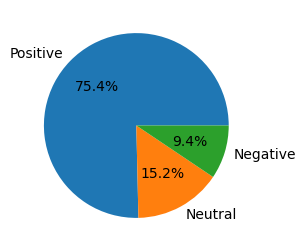

In [5]:
df['Sentiment'].value_counts().plot(kind='pie', ylabel='', figsize=(3,3), autopct='%1.1f%%')

# Overall sentiment of the product

>#### Overall sentiment of the product is positive with around 75% positive reviews

In [6]:
df_positive = df[df['Sentiment'] == 'Positive']
df_negative = df[df['Sentiment'] == 'Negative']

# Clustering - Positive Sentiment

In [7]:
import nltk
import re
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
from nltk import word_tokenize, pos_tag

stop_words = nltk.corpus.stopwords.words('english')
additional_stop_words = ['use', 'alexa', 'echo', 'dot', 'amazon', 'good', 'smart', 
                         'speaker', 'product', 'device', 'music', 'work', 'need',
                         'like', 'dont', 'thing', 'time', 'amazing', 'awesome',
                         'buy', 'best', 'great', 'nice', 'song', 'day', 'really',
                         'month', 'better', 'using', 'doesnt', 'got', 'super',
                         'play', 'useful', 'feature', 'way', 'make', 'value', 
                         'happy', 'new', 'used', 'price', 'gen', 'user', 'worth',
                         'love', 'review', 'home', 'working', 'item', 'thanks',
                         'superb', 'year', 'know', 'fine', 'loved', 'small']
stop_words.extend(additional_stop_words)


def preprocess(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    text = text.lower()
    text=text.strip()
    temp_sent =[]
    words = nltk.word_tokenize(text)
    for word in words:
        lemmatized = lemmatizer.lemmatize(word)
        if lemmatized not in stop_words and lemmatized.isalpha() and len(lemmatized)>2:
            temp_sent.append(lemmatized)
    
    finalsent = ' '.join(temp_sent)
    return finalsent

normalize_corpus = np.vectorize(preprocess)

positive_corpus = normalize_corpus(list(df_positive['Review']))

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# taking 5 for min_df and 0.9 as max_df as dataset is small.
cv = CountVectorizer(ngram_range=(1, 2), min_df=4, max_df=0.9, stop_words='english')

positive_cv_matrix = cv.fit_transform(positive_corpus)
# negative_cv_matrix = cv.fit_transform(negative_corpus)

print(positive_cv_matrix.shape)

(569, 404)


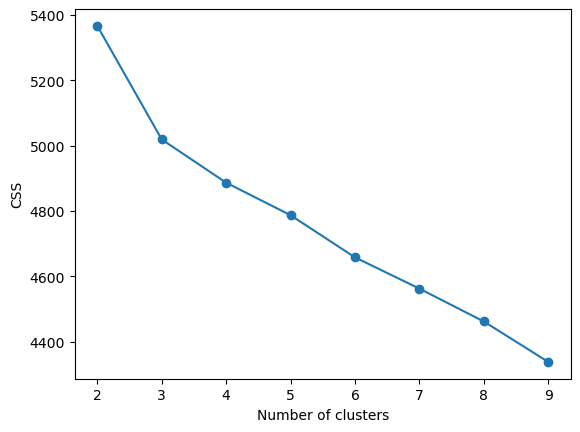

In [9]:
from sklearn.cluster import KMeans

min_range = 2
max_range = 10

# making elbow chart for finding K
css = [] 
for i in range(min_range, max_range): 
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=42).fit(positive_cv_matrix)
    css.append(kmeans.inertia_)
   
import matplotlib.pyplot as plt
plt.plot(range(min_range, max_range), css, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('CSS')
plt.show()

In [10]:
css_diff = []

for i in range(len(css)-1):
    css_diff.append([i+3,css[i+1]-css[i]])

css_diff

[[3, -347.48452377630656],
 [4, -132.35662364536347],
 [5, -99.5],
 [6, -129.0632515536954],
 [7, -95.63069601010557],
 [8, -100.59039979023237],
 [9, -123.76018299398856]]

In [11]:
NUM_CLUSTERS = 4
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(positive_cv_matrix)

feature_names = cv.get_feature_names_out()
topn_features = 8
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] for index in ordered_centroids[cluster_num, :topn_features]]
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['sound', 'quality', 'sound quality', 'voice', 'recognition', 'voice recognition', 'google', 'command']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['bulb', 'asked', 'kept', 'wipro', 'google', 'required', 'gadget', 'mobile']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['voice', 'sound', 'command', 'quality', 'recognition', 'google', 'bulb', 'excellent']
--------------------------------------------------------------------------------
CLUSTER #4
Key Features: ['google', 'assistant', 'google assistant', 'command', 'voice', 'volume', 'say', 'reminder']
--------------------------------------------------------------------------------


In [12]:
NUM_CLUSTERS = 3
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(positive_cv_matrix)

feature_names = cv.get_feature_names_out()
topn_features = 8
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] for index in ordered_centroids[cluster_num, :topn_features]]
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['sound', 'quality', 'sound quality', 'voice', 'recognition', 'voice recognition', 'google', 'command']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['google', 'assistant', 'google assistant', 'command', 'voice', 'volume', 'say', 'reminder']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['voice', 'bulb', 'sound', 'google', 'command', 'recognition', 'quality', 'voice recognition']
--------------------------------------------------------------------------------


# Cluster

>### 3 Clusters can be made for better understanding with different qualities of the product.
>##### Cluster 1 - sound quality and voice recognition features, tell about how Alexa is good in communicating compaed to its competitor, Google
>##### Cluster 2 - This cluster talks about comparasion of Alexa with Google Assistant feature wise, say about reminder tasks.
>##### Cluster 3 - This cluster talks about the integration of smart lights with Alexa and the ease of life experiences

# Topic modelling - Positive Sentiment

In [13]:
from sklearn.decomposition import LatentDirichletAllocation

# Run LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(positive_cv_matrix)

# Print top words for each topic
for idx, topic in enumerate(lda.components_):
    print(f"TOPIC {idx+1}:")
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('-'*100)


TOPIC 1:
['quality', 'enjoy', 'able', 'talk', 'control', 'update', 'playing', 'kid', 'language', 'sound']
----------------------------------------------------------------------------------------------------
TOPIC 2:
['member', 'voice recognition', 'hai', 'sound', 'recognition', 'prime', 'battery', 'integration', 'bulb', 'voice']
----------------------------------------------------------------------------------------------------
TOPIC 3:
['bluetooth', 'google mini', 'mini', 'voice command', 'excellent', 'sound', 'bulb', 'google', 'command', 'voice']
----------------------------------------------------------------------------------------------------
TOPIC 4:
['bass', 'listen', 'assistant', 'voice recognition', 'recognition', 'google', 'voice', 'sound quality', 'quality', 'sound']
----------------------------------------------------------------------------------------------------
TOPIC 5:
['mobile', 'app', 'power', 'voice', 'money', 'high', 'experience', 'issue', 'volume', 'lot']
--------

# The topics - Positive Sentiment

>### The positive reviews majorly talk about 4 topis, mainly consisting:

>#### topic 1 - enjoying conversation with alexa + child friendliness
>#### topic 2 - voice recognition and voice command features
>#### topic 3 - comparasion with competitors
>#### topic 4 - sound quality and bass
>#### topic 5 - mobile app capabilities

In [14]:
# Assign topics to each document
topic_assignment = lda.transform(positive_cv_matrix)
df_positive['topic'] = topic_assignment.argmax(axis=1) + 1
df_positive['topic'] = df_positive['topic'].map({1: 'enjoying conversation with alexa', 2: 'voice command features', 
                                                 3: 'comparasion with competitors', 4: 'sound quality and bass',
                                                 5: 'mobile app capabilities'})
df_positive.head()

,Location,Date,Rating,Manual Sentiment,Review,Sentiment,topic
0,India,2023-03-05,4,neutral,The sound is great. Integration of smart devic...,Positive,comparasion with competitors
1,India,2023-02-26,4,neutral,I just wish it had a backup option which can l...,Positive,voice command features
2,India,2023-03-02,4,neutral,Only needs live redio,Positive,enjoying conversation with alexa
3,India,2023-02-26,4,positive,"Product is of good quality, as per the specs",Positive,sound quality and bass
4,India,2023-02-20,5,positive,There remains something quite futuristic about...,Positive,comparasion with competitors


<AxesSubplot:>

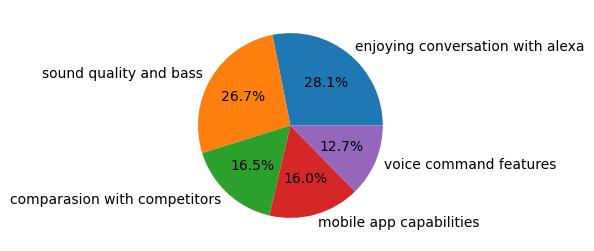

In [15]:
df_positive['topic'].value_counts().plot(kind='pie', ylabel='', figsize=(3,3), autopct='%1.1f%%')

# Clustering - Negative Sentiment

In [16]:
stop_words = nltk.corpus.stopwords.words('english')
additional_stop_words = ['use', 'alexa', 'echo', 'dot', 'amazon', 'good', 'smart', 
                         'speaker', 'product', 'device', 'work', 'need',
                         'like', 'dont', 'thing', 'time', 'amazing', 'awesome',
                         'buy', 'best', 'great', 'nice', 'song', 'day', 'really',
                         'month', 'better', 'using', 'doesnt', 'got', 'super',
                         'play', 'useful', 'feature', 'way', 'make', 'value', 
                         'happy', 'new', 'used', 'price', 'gen', 'user', 'worth',
                         'love', 'review', 'home', 'working', 'item', 'thanks',
                         'superb', 'year', 'know', 'fine', 'loved', 'small',
                         'bad', 'worst', 'poor', 'disappointed', 'ask', 'help', 
                         'low', 'ask', 'say', 'getting', 'tell', 'lot', 'want',
                         'response', 'account', 'unable', 'selection', 'pin', 
                         'long', 'wrong', 'aaps', 'aap']
stop_words.extend(additional_stop_words)

normalize_corpus = np.vectorize(preprocess)

negative_corpus = normalize_corpus(list(df_negative['Review']))

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# taking 5 for min_df and 0.9 as max_df as dataset is small.
cv = CountVectorizer(ngram_range=(1, 2), min_df=1, max_df=0.95, stop_words='english')

# positive_cv_matrix = cv.fit_transform(positive_corpus)
negative_cv_matrix = cv.fit_transform(negative_corpus)

print(negative_cv_matrix.shape)

(71, 1265)


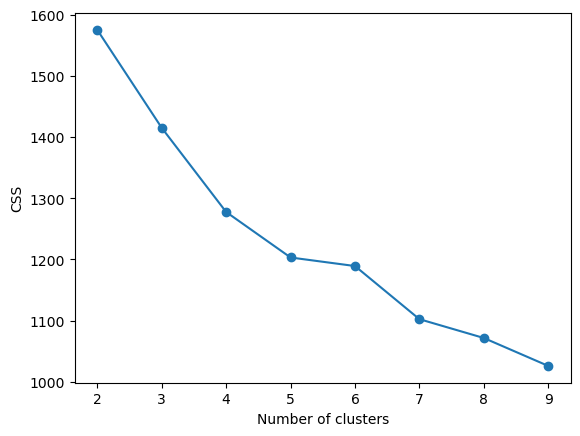

In [18]:
from sklearn.cluster import KMeans

min_range = 2
max_range = 10

# making elbow chart for finding K
css = [] 
for i in range(min_range, max_range): 
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=42).fit(negative_cv_matrix)
    css.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(min_range, max_range), css, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('CSS')
plt.show()

In [19]:
css_diff = []

for i in range(len(css)-1):
    css_diff.append([i+3,css[i+1]-css[i]])

css_diff

[[3, -160.08426501035206],
 [4, -137.52791986359853],
 [5, -74.3496488147498],
 [6, -13.96630483943909],
 [7, -86.85757575757543],
 [8, -30.75937500000009],
 [9, -45.640625]]

In [20]:
NUM_CLUSTERS = 4
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(negative_cv_matrix)

feature_names = cv.get_feature_names_out()
topn_features = 8
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] for index in ordered_centroids[cluster_num, :topn_features]]
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['sound', 'quality', 'voice', 'music', 'power', 'connect', 'battery', 'sound quality']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['warranty', 'service', 'policy', 'company', 'excuse', 'partner', 'lockdown', 'service warranty']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['reminder', 'voice', 'search', 'profanity', 'case', 'turn saying', 'turn', 'plan']
--------------------------------------------------------------------------------
CLUSTER #4
Key Features: ['music', 'resting', 'hungama', 'gaana hungama', 'reset', 'wifi', 'gaana', 'table']
--------------------------------------------------------------------------------


# Cluster

>### 4 Clusters can be made for better understanding with different drawbacks of the product.
>##### Cluster 1 - sound quality issues and absence of battery, tells that consumers expect better sound performance from Alexa and prefer a wireless battery powered product.
>##### Cluster 2 - This cluster talks about warranty and policy issues.
>##### Cluster 3 - This cluster talks about communication issues with Alexa
>##### Cluster 4 - This cluster talks about different music streaming providers and the absense of these providers in the product.

# Topic modelling - Negative Sentiment

In [21]:
from sklearn.decomposition import LatentDirichletAllocation

# Run LDA model
lda = LatentDirichletAllocation(n_components=4, random_state=42)
lda.fit(negative_cv_matrix)

# Print top words for each topic
for idx, topic in enumerate(lda.components_):
    print(f"TOPIC {idx+1}:")
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('-'*100)
    

TOPIC 1:
['connected', 'reset', 'money', 'support', 'issue', 'purchased', 'wifi', 'bulb', 'youtube', 'music']
----------------------------------------------------------------------------------------------------
TOPIC 2:
['radio', 'old', 'quality', 'spotify', 'policy', 'playing', 'connect', 'google', 'service', 'warranty']
----------------------------------------------------------------------------------------------------
TOPIC 3:
['update', 'answer', 'repair', 'purchased', 'usage', 'search', 'sound', 'charger', 'reminder', 'voice']
----------------------------------------------------------------------------------------------------
TOPIC 4:
['bluetooth', 'command', 'problem', 'plug', 'battery', 'sound quality', 'voice', 'power', 'quality', 'sound']
----------------------------------------------------------------------------------------------------


# The topics - Negative Sentiment

>### The negative reviews majorly talk about 4 topis, mainly consisting:

>#### topic 1 - connectivity issues
>#### topic 2 - issues with music playing
>#### topic 3 - issue with update and repair
>#### topic 4 - issue with communication with Alexa

In [22]:
# Assign topics to each document
topic_assignment = lda.transform(negative_cv_matrix)
df_negative['topic'] = topic_assignment.argmax(axis=1) + 1
df_negative['topic'] = df_negative['topic'].map({1: 'connectivity issues', 2: 'issues with music playing', 
                                                 3: 'issue with update and repair', 4: 'issue with communication with Alexa'})
df_negative.head()

,Location,Date,Rating,Manual Sentiment,Review,Sentiment,topic
13,India,2023-01-21,4,negative,"My device is not working , it's one year old a...",Negative,issue with communication with Alexa
31,India,2022-12-10,4,neutral,LikeReally a good product clear sound quick re...,Negative,issue with update and repair
89,India,2022-12-21,5,negative,We started using this product since April 202...,Negative,issue with communication with Alexa
100,India,2022-10-24,4,neutral,Smart bulb setup was not easy,Negative,issue with communication with Alexa
105,India,2023-01-02,5,neutral,Average product,Negative,issue with communication with Alexa


<AxesSubplot:>

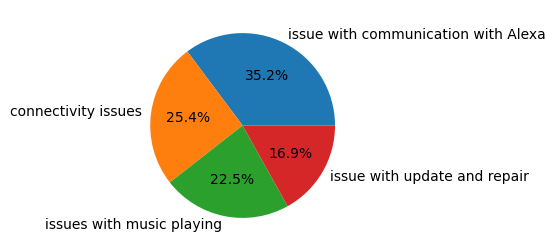

In [23]:
df_negative['topic'].value_counts().plot(kind='pie', ylabel='', figsize=(3,3), autopct='%1.1f%%')

***

___

# Phase 2
>### 25% Recent Reviews

In [24]:
df_positive = df_positive.sort_values(by=['Date'], ascending=False)[:round(len(df_positive)*.25)]
df_negative = df_negative.sort_values(by=['Date'], ascending=False)[:round(len(df_positive)*.25)]

In [25]:
positive_corpus = normalize_corpus(list(df_positive['Review']))

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# taking 1 for min_df and 0.9 as max_df as dataset is small.
cv = CountVectorizer(ngram_range=(1, 2), min_df=1, max_df=0.98, stop_words='english')

positive_cv_matrix = cv.fit_transform(positive_corpus)
# negative_cv_matrix = cv.fit_transform(negative_corpus)

print(positive_cv_matrix.shape)

(142, 1338)


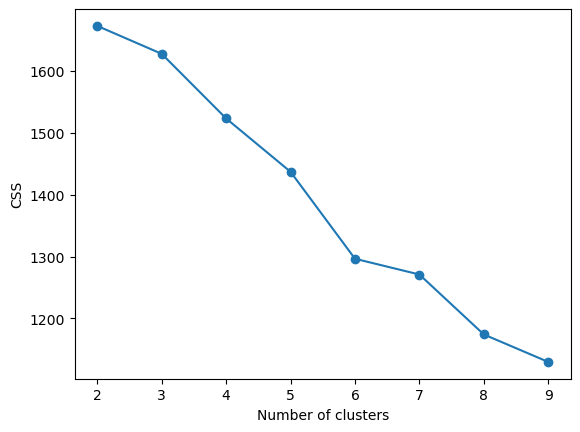

In [27]:
from sklearn.cluster import KMeans

min_range = 2
max_range = 10

# making elbow chart for finding K
css = [] 
for i in range(min_range, max_range): 
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=42).fit(positive_cv_matrix)
    css.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(min_range, max_range), css, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('CSS')
plt.show()

In [28]:
css_diff = []

for i in range(len(css)-1):
    css_diff.append([i+3,css[i+1]-css[i]])

css_diff

[[3, -45.15197568389067],
 [4, -104.42034943473777],
 [5, -86.20342073448751],
 [6, -140.50970219782312],
 [7, -25.467367969086354],
 [8, -96.8668845315899],
 [9, -44.38728579325607]]

In [29]:
NUM_CLUSTERS = 3
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(positive_cv_matrix)

feature_names = cv.get_feature_names_out()
topn_features = 8
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] for index in ordered_centroids[cluster_num, :topn_features]]
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['sound', 'quality', 'voice', 'sound quality', 'music', 'wifi', 'command', 'money']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['improved', 'remains', 'hearing', 'sound improved', 'sound', 'pro clear', 'pro', 'box']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['upgrade', 'generation', 'version', 'audio', 'popular', 'number', 'music', 'released']
--------------------------------------------------------------------------------


# Cluster

>### 3 Clusters can be made from Recent Positive Reviews for better understanding with different features of the product.
>##### Cluster 1 - sound quality and network connectivity featues.
>##### Cluster 2 - This cluster talks about sound improvement of the product. This tells how the sound quality improved recently as compared to past reviews.
>##### Cluster 3 - This cluster talks about an upgrade in the overall experience of the product. This tell that Amazon has improved the product drastically in last years version of the product.

# Topic modelling - Positive Sentiment

In [30]:
from sklearn.decomposition import LatentDirichletAllocation

# Run LDA model
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(positive_cv_matrix)

# Print top words for each topic
for idx, topic in enumerate(lda.components_):
    print(f"TOPIC {idx+1}:")
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('-'*100)


TOPIC 1:
['news', 'service', 'recognition', 'voice recognition', 'wifi', 'music', 'voice', 'sound quality', 'quality', 'sound']
----------------------------------------------------------------------------------------------------
TOPIC 2:
['generation', 'upgrade', 'youtube', 'quality', 'voice', 'command', 'audio', 'money', 'listen', 'music']
----------------------------------------------------------------------------------------------------
TOPIC 3:
['improved', 'music', 'hai', 'wifi', 'experience', 'clear', 'voice command', 'sound', 'command', 'voice']
----------------------------------------------------------------------------------------------------


# The topics - Recent Positive Sentiment

>### The positive reviews majorly talk about 4 topis, mainly consisting:

>#### topic 1 - technology improvements
>> This tells how the product has improved it's voice recognition and sound quality technology in the recent version of the product.
>#### topic 2 - speed of online streaming
>> This tells how Amazon has improved the connectivity of the product
>#### topic 3 - about new version released
>> This tells that Amazon is bringing connstant firmware updates on the product.

In [31]:
# Assign topics to each document
topic_assignment = lda.transform(positive_cv_matrix)
df_positive['topic'] = topic_assignment.argmax(axis=1) + 1
df_positive['topic'] = df_positive['topic'].map({1: 'technology improvements', 2: 'speed of online streaming', 3: 'about new version released'})
df_positive.head()

,Location,Date,Rating,Manual Sentiment,Review,Sentiment,topic
0,India,2023-03-05,4,neutral,The sound is great. Integration of smart devic...,Positive,about new version released
11,India,2023-03-04,3,neutral,"I didn't have wifi at home, so i thought it wo...",Positive,about new version released
9,India,2023-03-03,5,positive,"We loved it with the functionality,Catches the...",Positive,technology improvements
32,India,2023-03-03,3,neutral,This is not a music system but yes it can ente...,Positive,speed of online streaming
15,India,2023-03-03,5,positive,Excellent product,Positive,technology improvements


<AxesSubplot:>

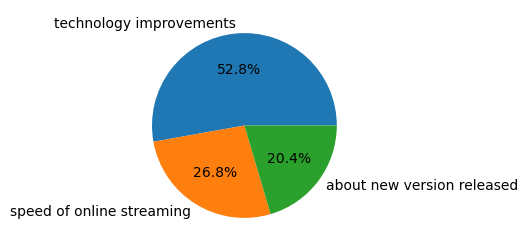

In [32]:
df_positive['topic'].value_counts().plot(kind='pie', ylabel='', figsize=(3,3), autopct='%1.1f%%')

# Clustering - Negative Sentiment

In [33]:
negative_corpus = normalize_corpus(list(df_negative['Review']))

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

# taking 5 for min_df and 0.9 as max_df as dataset is small.
cv = CountVectorizer(ngram_range=(2, 2), min_df=1, max_df=0.98, stop_words='english')

# positive_cv_matrix = cv.fit_transform(positive_corpus)
negative_cv_matrix = cv.fit_transform(negative_corpus)

print(negative_cv_matrix.shape)

(36, 209)


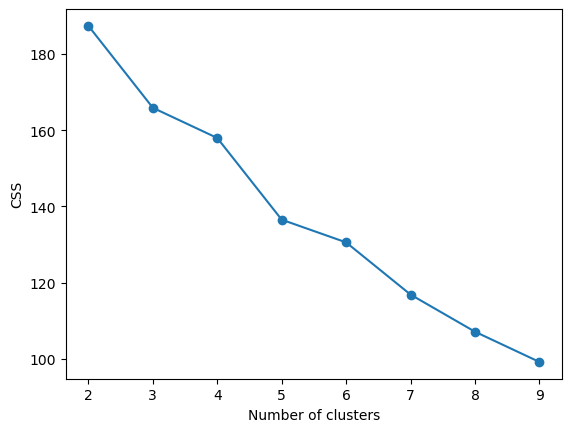

In [35]:
from sklearn.cluster import KMeans

min_range = 2
max_range = 10

# making elbow chart for finding K
css = [] 
for i in range(min_range, max_range): 
    kmeans = KMeans(n_clusters=i, max_iter=100, n_init=10, random_state=42).fit(negative_cv_matrix)
    css.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(min_range, max_range), css, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('CSS')
plt.show()

In [36]:
css_diff = []

for i in range(len(css)-1):
    css_diff.append([i+3,css[i+1]-css[i]])

css_diff

[[3, -21.461344537815165],
 [4, -7.913547237076642],
 [5, -21.408143939393938],
 [6, -5.950604838709694],
 [7, -13.6806451612903],
 [8, -9.72758620689656],
 [9, -7.922413793103445]]

In [37]:
NUM_CLUSTERS = 3
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=15, random_state=42).fit(negative_cv_matrix)

feature_names = cv.get_feature_names_out()
topn_features = 8
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] for index in ordered_centroids[cluster_num, :topn_features]]
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['setting catch', 'experience listen', 'google question', 'giving star', 'condition problem', 'question answer', 'properly respond', 'problem google']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['recognise voice', 'sound quality', 'gya etana', 'kaise purchase', 'jio fibre', 'issue recommend', 'irritated simple', 'instrumental instruction']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['money support', 'big smallest', 'router signal', 'end resetting', 'reconfigure connectivity', 'everyday end', 'shifted sleep', 'connectivity failure']
--------------------------------------------------------------------------------


# Cluster - Recent Negative

>### 3 Clusters can be made from Recent Negative Reviews for better understanding with different features of the product.
>##### Cluster 1 - poor responses by Alexa
>##### Cluster 2 - This cluster talks about voice recognition issues
>##### Cluster 3 - This cluster talks about connectivity issues.

# Topic modelling - Negative Sentiment

In [38]:
from sklearn.decomposition import LatentDirichletAllocation

# Run LDA model
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(negative_cv_matrix)

# Print top words for each topic
for idx, topic in enumerate(lda.components_):
    print(f"TOPIC {idx+1}:")
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('-'*100)
    

TOPIC 1:
['sleep router', 'signal true', 'model issue', 'shifted sleep', 'plus big', 'router signal', 'end resetting', 'money support', 'sound quality', 'waste money']
----------------------------------------------------------------------------------------------------
TOPIC 2:
['mic setting', 'question answer', 'setting catch', 'network condition', 'star reason', 'properly respond', 'condition problem', 'respond network', 'answer recommend', 'recognise voice']
----------------------------------------------------------------------------------------------------


# The topics - Recent Positive Sentiment

>### The positive reviews majorly talk about 4 topis, mainly consisting:

>#### topic 1 - warranty claim issues
>> This tells how the customers are still facing warranty claim issues. This can be a major improvement and focus area for the product.
>#### topic 2 - comments saying product is costly
>> This tells how Amazon is charging hefty price for it's product.

In [39]:
# Assign topics to each document
topic_assignment = lda.transform(negative_cv_matrix)
df_negative['topic'] = topic_assignment.argmax(axis=1) + 1
df_negative['topic'] = df_negative['topic'].map({1 : 'warranty claim issues', 2 : 'comments saying product is costly'})
df_negative.head()

,Location,Date,Rating,Manual Sentiment,Review,Sentiment,topic
473,India,2023-03-07,1,negative,My Alexa is not working. Don't buy this produc...,Negative,warranty claim issues
466,India,2023-03-06,1,negative,One thing is bad .... it's command other's whi...,Negative,comments saying product is costly
137,India,2023-03-05,2,negative,Reviewing approximately after a year of usage ...,Negative,warranty claim issues
451,India,2023-03-04,1,negative,I have purchased Alexa only to connect with my...,Negative,comments saying product is costly
472,India,2023-03-02,3,negative,Echo ki price 2500rs h and charger 2000rs. Mer...,Negative,warranty claim issues


<AxesSubplot:>

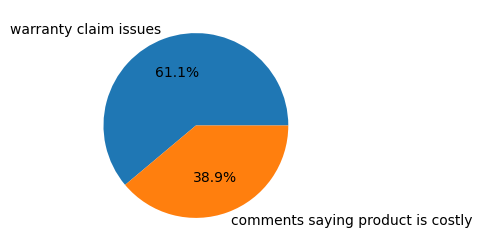

In [40]:
df_negative['topic'].value_counts().plot(kind='pie', ylabel='', figsize=(3,3), autopct='%1.1f%%')

---

---

# Phase 3

In [41]:
df = df.sort_values(by=['Date'], ascending=False)[:round(len(df_positive)*.25)]
reviews = df['Review'].values.tolist()

In [42]:
negative_sentences = ''

for review in reviews:
    for blob in review.split('.'):
        if(TextBlob(blob).sentiment.polarity < 0):
#             print(blob)
#             print(TextBlob(blob).sentiment.polarity)
            negative_sentences = negative_sentences + ' ' + blob
# print('-'*80)
negative_sentences

"  Its waste of money One thing is bad   it's command other's while its bad for connect home appliances   it's most dangerous It has trouble understanding the voice commands 1 out of 3 times  The placement of mic is not good Reviewing approximately after a year of usage  I didn't have wifi at home, so i thought it would be difficult to connect and operate this echo dot I have purchased Alexa only to connect with my smart LG tv, but it is connecting with it, also I have connected with the support team, they also failed to help me  Worst product for manufacturing and for prices Bad  Earlier I think it may happened due to low internet speed but I have attached this eco with speed og >100 mbps also still facing same issue Not much useful for meBut i bought this for my son to listen to audio books  Disappointed… :-(  The small, puck-shaped design remains but it has been jazzed-up and improved on this 3rd-gen Dot Pros+Clear, solid sound+Improved Alexa capabilities+Budget priceCons-Alexa inte

In [43]:
cv_negative_sentences = cv.fit_transform(positive_corpus)
print(cv_negative_sentences.shape)

(142, 764)


In [44]:
blob = TextBlob(negative_sentences)
blist = blob.sentiment_assessments.assessments
blist

[(['waste'], -0.2, 0.0, None),
 (['bad'], -0.6999999999999998, 0.6666666666666666, None),
 (['other'], -0.125, 0.375, None),
 (['bad'], -0.6999999999999998, 0.6666666666666666, None),
 (['most'], 0.5, 0.5, None),
 (['dangerous'], -0.6, 0.9, None),
 (['trouble'], -0.2, 0.2, None),
 (['not', 'good'], -0.35, 0.6000000000000001, None),
 (['approximately'], -0.4, 0.6, None),
 (['difficult'], -0.5, 1.0, None),
 (['only'], 0.0, 1.0, None),
 (['smart'], 0.21428571428571427, 0.6428571428571429, None),
 (['failed'], -0.5, 0.3, None),
 (['worst'], -1.0, 1.0, None),
 (['bad'], -0.6999999999999998, 0.6666666666666666, None),
 (['earlier'], 0.0, 0.5, None),
 (['due'], -0.125, 0.375, None),
 (['low'], 0.0, 0.3, None),
 (['same'], 0.0, 0.125, None),
 (['not', 'much', 'useful'], -0.15, 0.0, None),
 ([':-('], -0.75, 1.0, 'mood'),
 (['small'], -0.25, 0.4, None),
 (['solid'], 0.0, 0.1, None),
 (['limited'], -0.07142857142857142, 0.14285714285714285, None),
 (['other'], -0.125, 0.375, None),
 (['only'], 0.

In [45]:
# nsentence = []
# for p in range(len(blob.sentences)):
#     if blob.sentences[p].sentiment_assessments.assessments != []:
#         pl = blob.sentences[p].sentiment_assessments.assessments[0][1]
#         if pl < 0:
#             nsentence.append(blob.sentences[p])
            
# print(nsentence[0:25])

In [46]:
senti_neg = []
for i in range(len(blist)):
    plt = blist[i][1]
    if plt < 0:
        senti_neg.append(blist[i][0])
        
senti_neg

[['waste'],
 ['bad'],
 ['other'],
 ['bad'],
 ['dangerous'],
 ['trouble'],
 ['not', 'good'],
 ['approximately'],
 ['difficult'],
 ['failed'],
 ['worst'],
 ['bad'],
 ['due'],
 ['not', 'much', 'useful'],
 [':-('],
 ['small'],
 ['limited'],
 ['other'],
 ['few'],
 ['down'],
 ['useless']]

In [47]:
nsenti = []
for i in range(len(senti_neg)):
    nlist = senti_neg[i]
    for j in range(len(nlist)):
        nsenti.append(nlist[j])

nsenti

['waste',
 'bad',
 'other',
 'bad',
 'dangerous',
 'trouble',
 'not',
 'good',
 'approximately',
 'difficult',
 'failed',
 'worst',
 'bad',
 'due',
 'not',
 'much',
 'useful',
 ':-(',
 'small',
 'limited',
 'other',
 'few',
 'down',
 'useless']

In [48]:
ngram_freq = nltk.FreqDist() #WE INITIALIZED A FREQUENCY COUNTER

for ngram in nltk.ngrams(nsenti, 1):
    ngram_freq[ngram] += 1
ngram_freq.most_common()

[(('bad',), 3),
 (('other',), 2),
 (('not',), 2),
 (('waste',), 1),
 (('dangerous',), 1),
 (('trouble',), 1),
 (('good',), 1),
 (('approximately',), 1),
 (('difficult',), 1),
 (('failed',), 1),
 (('worst',), 1),
 (('due',), 1),
 (('much',), 1),
 (('useful',), 1),
 ((':-(',), 1),
 (('small',), 1),
 (('limited',), 1),
 (('few',), 1),
 (('down',), 1),
 (('useless',), 1)]

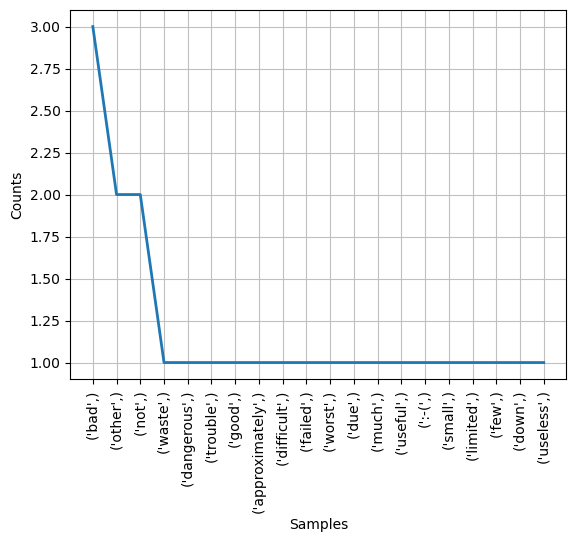

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [49]:
ngram_freq.plot(30)

>#### topic 1 - three words picked
>>#### 'bad'
>>#### 'not'
>>#### 'waste'

In [53]:
negative_word_sentences = []

for sent in reviews:
    if 'bad' in sent:
        negative_word_sentences.append(sent)
    elif 'not' in sent:
        negative_word_sentences.append(sent)
    elif 'waste' in sent:
        negative_word_sentences.append(sent)

cv.fit_transform(negative_word_sentences)

lda.fit(cv.fit_transform(negative_word_sentences))

# Print top words for each topic
for idx, topic in enumerate(lda.components_):
    print(f"TOPIC {idx+1}:")
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('-'*100)

TOPIC 1:
['understanding voice', 'smart devices', 'mic good', 'times placement', 'ordered trouble', 'sound great', 'placement mic', 'commands times', 'devices ordered', 'trouble understanding']
----------------------------------------------------------------------------------------------------
TOPIC 2:
['looks noticeably', 'little electronic', 'jazzed improved', 'intelligence limited', 'improved alexa', 'improved 3rd', 'hearing responses', 'hard exterior', 'puck shaped', 'model controls']
----------------------------------------------------------------------------------------------------


# The topics - Recent Positive Sentiment

>### The positive reviews majorly talk about 4 topis, mainly consisting:

>#### topic 1 - mic placement issues
>> This tells how the customers are facing issues with communication bcz of mic issues.
>#### topic 2 - limited intelligence
>> This tells how consumers are facing limited intelligence in Alexa.

# Phase 5

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Define X and y
X = (df['Review'])
y = df['Sentiment']

# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB()),
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.625
Confusion Matrix:
 [[0 3]
 [0 5]]
Classification Report:
               precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00         3
    Positive       0.62      1.00      0.77         5

    accuracy                           0.62         8
   macro avg       0.31      0.50      0.38         8
weighted avg       0.39      0.62      0.48         8



# Classification 

>### We have an accuracy of 62% for the model.
